# Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget



# === CONFIGURATION ===
# --- Step 1: Set the name of your .txt file here ---
filename = "../data/40_steps.txt"  # <--- CHANGE THIS
# filename = "10_mais_10.txt"  # <--- CHANGE THIS

collumn_names = ['ax', 'ay', 'az', 'gx', 'gy', 'gz']
df = pd.read_csv(filename, header=None, names=collumn_names)
# === ADD THE NEW COLUMN ===
# Calculate the acceleration magnitude using the formula sqrt(ax^2 + ay^2 + az^2)
# and add it as a new column called 'accel_magnitude'.
df['accel_magnitude'] = np.sqrt(df['ax']**2 + df['ay']**2 + df['az']**2)
print(f"Successfully loaded '{filename}'.")
print(f"Found {len(df)} rows and {df.shape[1]} columns of data.")

# --- Step 2: Define the titles for your plots ---
titles = [
    "Accel X (g)", "Accel Y (g)", "Accel Z (g)",
    "Gyro X (°/s)", "Gyro Y (°/s)", "Gyro Z (°/s)"
]

# o -1 TIRA O OFFSET DA GRAVIDADE JÁ !!!!
df['accel_magnitude'] = np.sqrt(df['ax']**2 + df['ay']**2 + df['az']**2) - 1


Successfully loaded '../data/40_steps.txt'.
Found 5897 rows and 7 columns of data.


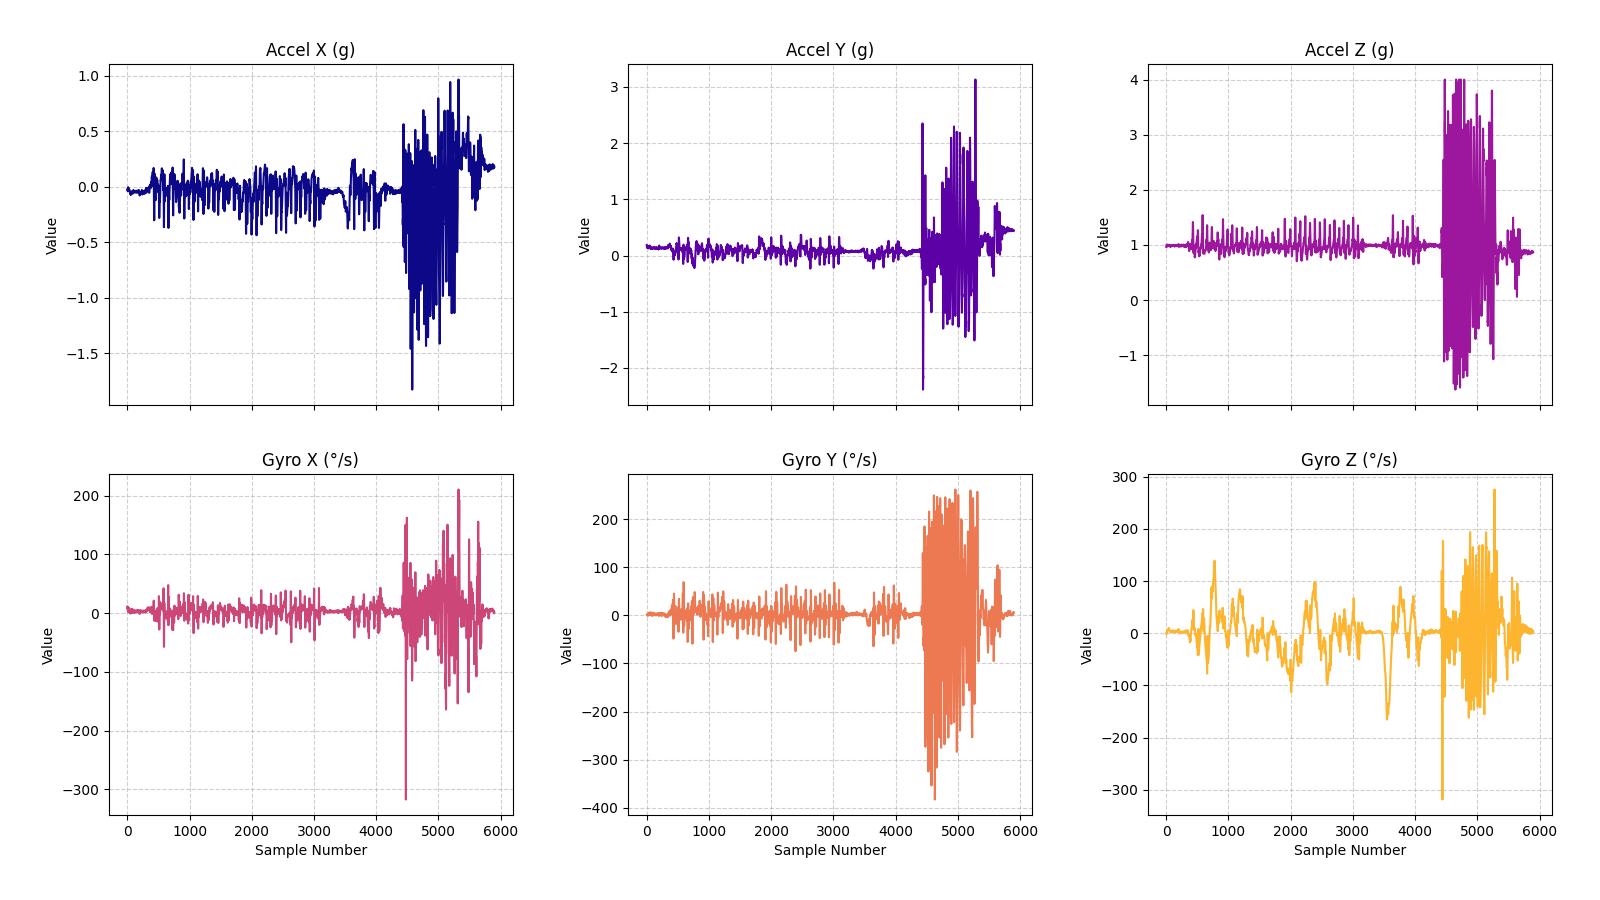

In [2]:
# Create a figure and a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(16, 9), sharex=True)

# Flatten the 2x3 `axes` array into a 1D array to easily loop through it
axes = axes.flatten()

# --- Loop through each of the 6 columns and plot it ---
for i in range(6):
    ax = axes[i]            # Get the current subplot axis
    column_data = df[collumn_names[i]]     # Get the data for the i-th column

    # Plot the data on the current axis
    ax.plot(column_data, label=titles[i], color=plt.cm.plasma(i/6))

    # Set the title and labels for the subplot
    ax.set_title(titles[i], fontsize=12)
    ax.set_ylabel("Value")

    # Add a grid for better readability
    ax.grid(True, linestyle='--', alpha=0.6)

# Set the x-axis label only for the bottom plots
for i in range(3, 6):
    axes[i].set_xlabel("Sample Number")

# Adjust the layout to prevent titles and labels from overlapping
fig.tight_layout(pad=3.0)
# --- Show the plot window ---
plt.show()

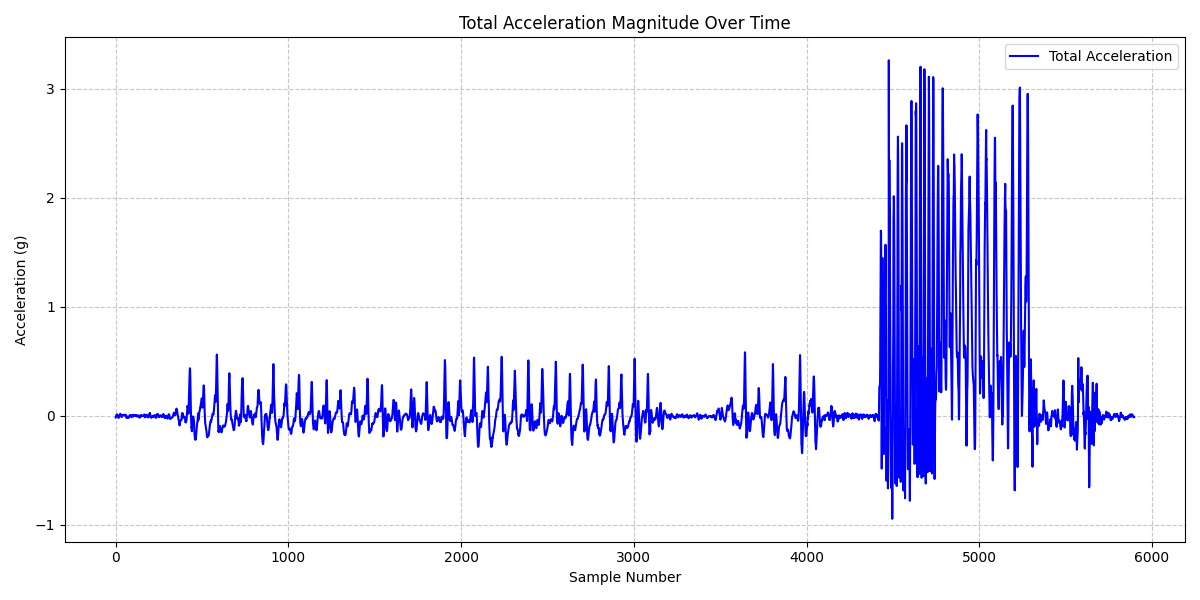

In [3]:
plt.figure(figsize=(12, 6))

# Plot the 'accel_magnitude' column
plt.plot(df['accel_magnitude'], label='Total Acceleration', color='blue')

# Add titles and labels for clarity
plt.title('Total Acceleration Magnitude Over Time')
plt.xlabel('Sample Number')
plt.ylabel('Acceleration (g)')

# Add a grid for easier analysis
plt.grid(True, linestyle='--', alpha=0.7)

# Add a legend to identify the plot line
plt.legend()

# Ensure the plot layout is clean
plt.tight_layout()

# Show the plot
plt.show()

# Filtering

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def exponential_moving_average(signal, alpha):
    """Calculates the Exponential Moving Average of a signal."""
    filtered_signal = [signal[0]]
    for i in range(1, len(signal)):
        new_filtered_value = (alpha * signal[i]) + ((1 - alpha) * filtered_signal[-1])
        filtered_signal.append(new_filtered_value)
    return filtered_signal

# --- Apply the custom filters ---
# Apply Exponential Moving Average with a smoothing factor of 0.1
# A smaller alpha means more smoothing.
alpha = 0.03
df['ax_lp'] = exponential_moving_average(df['ax'] , alpha=alpha)
df['ay_lp'] = exponential_moving_average(df['ay'] , alpha=alpha)
df['az_lp'] = exponential_moving_average(df['az'] , alpha=alpha)

df['accel_magnitude_lp'] = np.sqrt(df['ax_lp']**2 + df['ay_lp']**2 + df['az_lp']**2) - 1



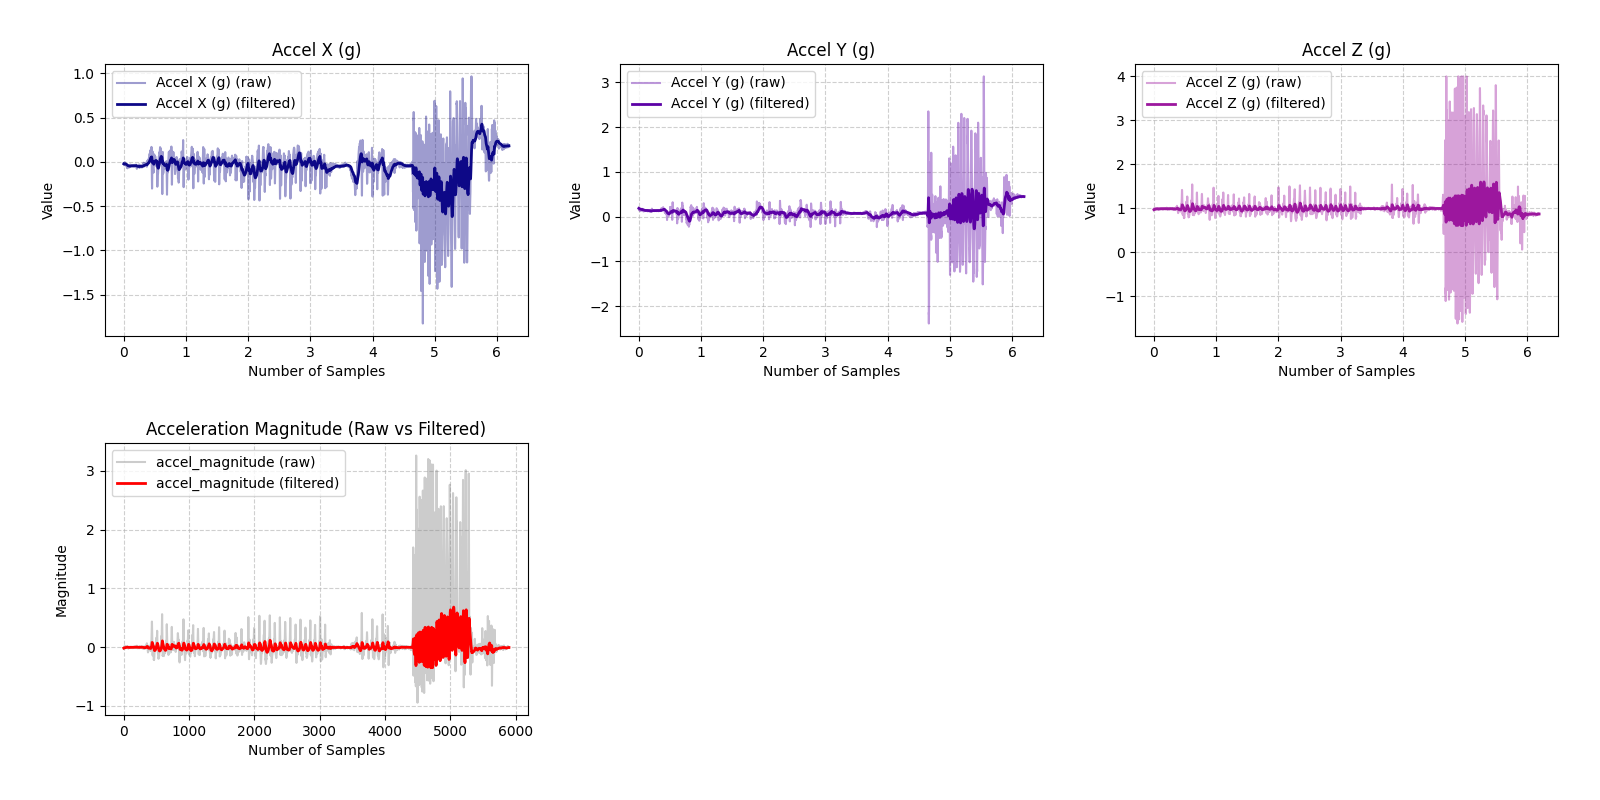

In [5]:
import matplotlib.pyplot as plt

# Create a 2x3 grid of subplots (extra row for the magnitude plot)
fig, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False)

# Flatten axes array
axes = axes.flatten()

# --- Top row: your 3 filtered plots ---
for i in range(3):
    ax = axes[i]  # current subplot axis

    # Get data for this subplot
    col = collumn_names[i]  # make sure variable name is correct (not 'collumn_names')
    raw = df[col]
    filtered = df[col + "_lp"]


    # Plot original and filtered signals
    ax.plot(np.arange(len(df)) / 952, raw, label=f"{titles[i]} (raw)", color=plt.cm.plasma(i / 6), alpha=0.4)
    ax.plot(np.arange(len(df)) / 952, filtered, label=f"{titles[i]} (filtered)", color=plt.cm.plasma(i / 6), linewidth=2)

    # Titles, labels, and grid
    ax.set_title(titles[i], fontsize=12)
    ax.set_ylabel("Value")
    ax.set_xlabel("Number of Samples")
    ax.grid(True, linestyle="--", alpha=0.6)
    ax.legend()

# --- Bottom plot: accel_magnitude vs accel_magnitude_lp ---
ax_mag = axes[3]  # use the next available subplot (bottom-left position)

ax_mag.plot(df['accel_magnitude'], label='accel_magnitude (raw)', color='gray', alpha=0.4)
ax_mag.plot(df['accel_magnitude_lp'], label='accel_magnitude (filtered)', color='red', linewidth=2)

ax_mag.set_title("Acceleration Magnitude (Raw vs Filtered)", fontsize=12)
ax_mag.set_ylabel("Magnitude")
ax_mag.set_xlabel("Number of Samples")
ax_mag.grid(True, linestyle="--", alpha=0.6)
ax_mag.legend()

# Hide any unused subplots (since we have 4 used out of 6)
for j in range(4, 6):
    fig.delaxes(axes[j])

# Adjust layout
fig.tight_layout(pad=3.0)

# Show figure
plt.show()


### aplicar agora um filtro de media para reduzir mais e termos apenas picos UP-DOWN e nao coisas tipo UP-Up(mas menos intenso) e down

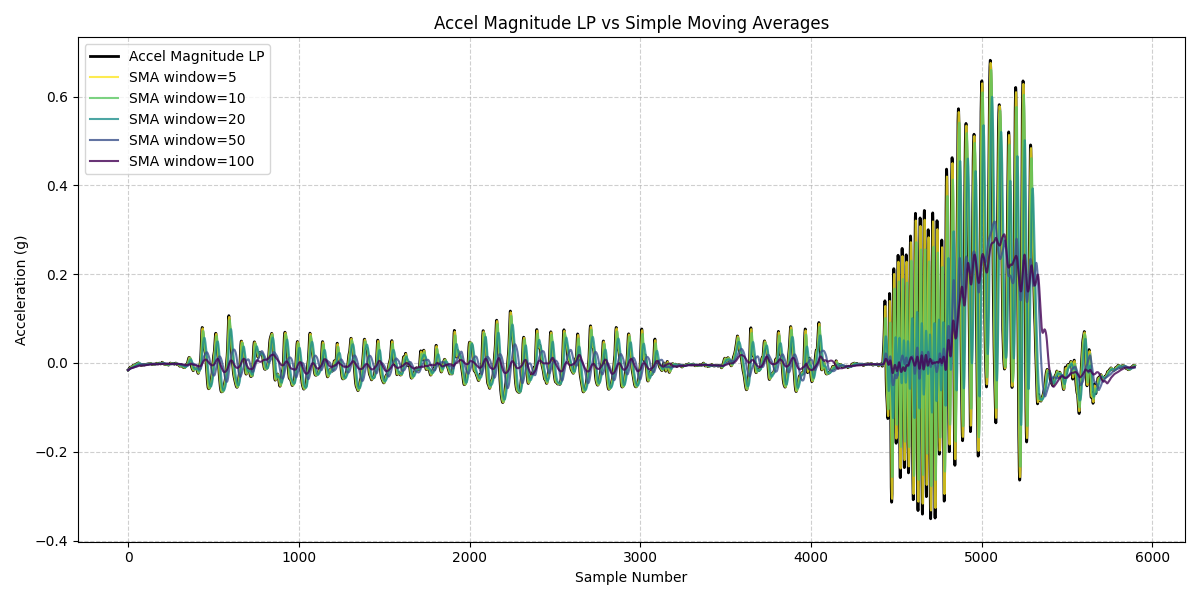

In [6]:
import matplotlib.pyplot as plt


def simple_moving_average(signal, window_size):
    """Calculates the Simple Moving Average of a signal."""
    filtered_signal = []
    for i in range(len(signal)):
        start_index = max(0, i - window_size + 1)
        window = signal[start_index : i + 1]
        window_average = sum(window) / len(window)
        filtered_signal.append(window_average)
    return filtered_signal

# Example window sizes for SMAs
window_sizes = [5, 10, 20, 50, 100]

# Calculate all SMAs of accel_magnitude_lp with different windows
sma_signals = [simple_moving_average(df['accel_magnitude_lp'], w) for w in window_sizes]

plt.figure(figsize=(12, 6))

# Plot the original low-pass filtered accel magnitude
plt.plot(df['accel_magnitude_lp'], label='Accel Magnitude LP', linewidth=2, color='black')

# Plot each SMA with different window sizes
colors = plt.cm.viridis_r(np.linspace(0, 1, len(window_sizes)))
for i, (sma, w) in enumerate(zip(sma_signals, window_sizes)):
    plt.plot(sma, label=f'SMA window={w}', alpha=0.8, color=colors[i])

plt.title('Accel Magnitude LP vs Simple Moving Averages')
plt.xlabel('Sample Number')
plt.ylabel('Acceleration (g)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


### o objetivo é tornar o sinal numa sinusoide para identificar o pico alto e baixo do step, assim a funcao é convexa e portanto fica com picos bem definidos

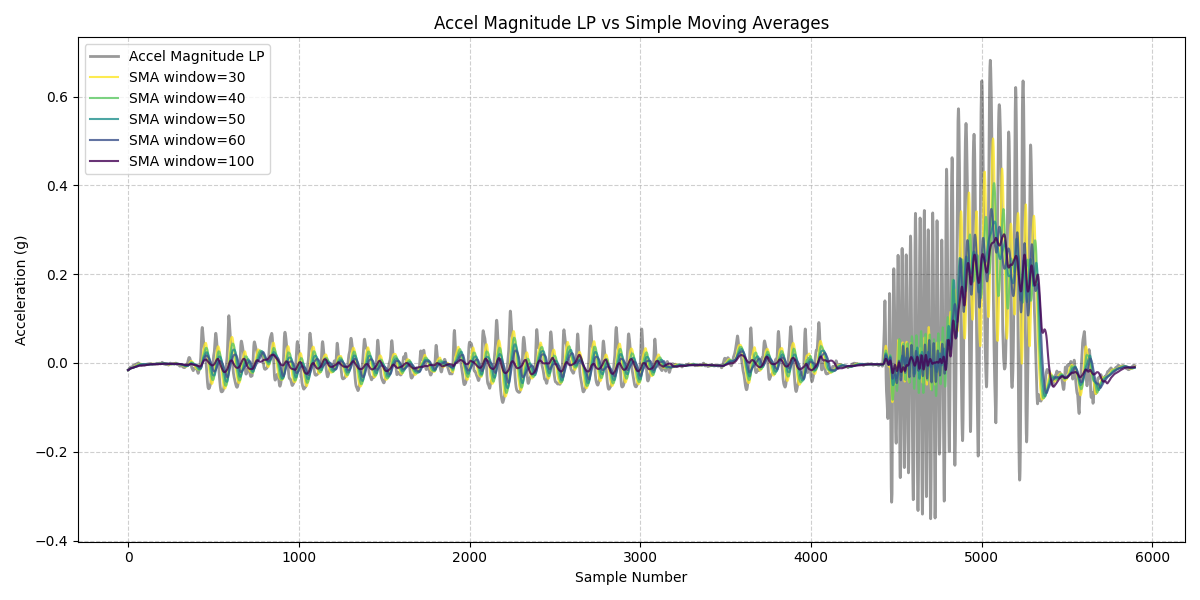

In [7]:
import matplotlib.pyplot as plt


def simple_moving_average(signal, window_size):
    """Calculates the Simple Moving Average of a signal."""
    filtered_signal = []
    for i in range(len(signal)):
        start_index = max(0, i - window_size + 1)
        window = signal[start_index : i + 1]
        window_average = sum(window) / len(window)
        filtered_signal.append(window_average)
    return filtered_signal

# Example window sizes for SMAs
window_sizes = [30, 40, 50, 60, 100]

# Calculate all SMAs of accel_magnitude_lp with different windows
sma_signals = [simple_moving_average(df['accel_magnitude_lp'], w) for w in window_sizes]

plt.figure(figsize=(12, 6))

# Plot the original low-pass filtered accel magnitude
plt.plot(df['accel_magnitude_lp'], label='Accel Magnitude LP', linewidth=2, color='black', alpha=0.4)

# Plot each SMA with different window sizes
colors = plt.cm.viridis_r(np.linspace(0, 1, len(window_sizes)))
for i, (sma, w) in enumerate(zip(sma_signals, window_sizes)):
    plt.plot(sma, label=f'SMA window={w}', alpha=0.8, color=colors[i])

plt.title('Accel Magnitude LP vs Simple Moving Averages')
plt.xlabel('Sample Number')
plt.ylabel('Acceleration (g)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


#### 30 parece ser a media de samples ideal

## peak detection

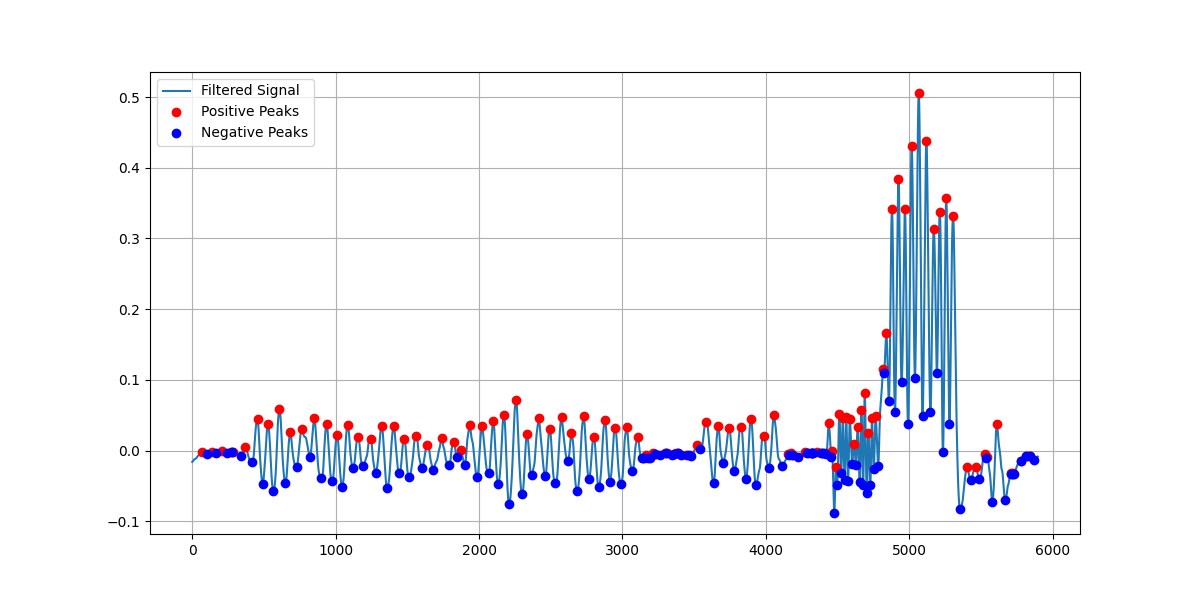

In [8]:
import numpy as np
import matplotlib.pyplot as plt

optimal_w = 30
signal = np.array(simple_moving_average(df['accel_magnitude_lp'], optimal_w))

peaks_pos = []
peaks_neg = []

# We'll keep track of the previous two points to check if the middle one is a peak
# Start iterating from index 2, so we have i-2, i-1, i points for checking peaks
for i in range(2, len(signal)):
    prev2 = signal[i-2]
    prev1 = signal[i-1]
    curr = signal[i]

    # Check if prev1 is a positive peak: goes up then down
    if prev1 > prev2 and prev1 > curr:
        peaks_pos.append(i-1)

    # Check if prev1 is a negative peak: goes down then up
    if prev1 < prev2 and prev1 < curr:
        peaks_neg.append(i-1)

plt.figure(figsize=(12, 6))
plt.plot(signal, label='Filtered Signal')
plt.plot(peaks_pos, signal[peaks_pos], 'ro', label='Positive Peaks')
plt.plot(peaks_neg, signal[peaks_neg], 'bo', label='Negative Peaks')
plt.legend()
plt.grid(True)
plt.show()


# step count algorithm

Step count: 43


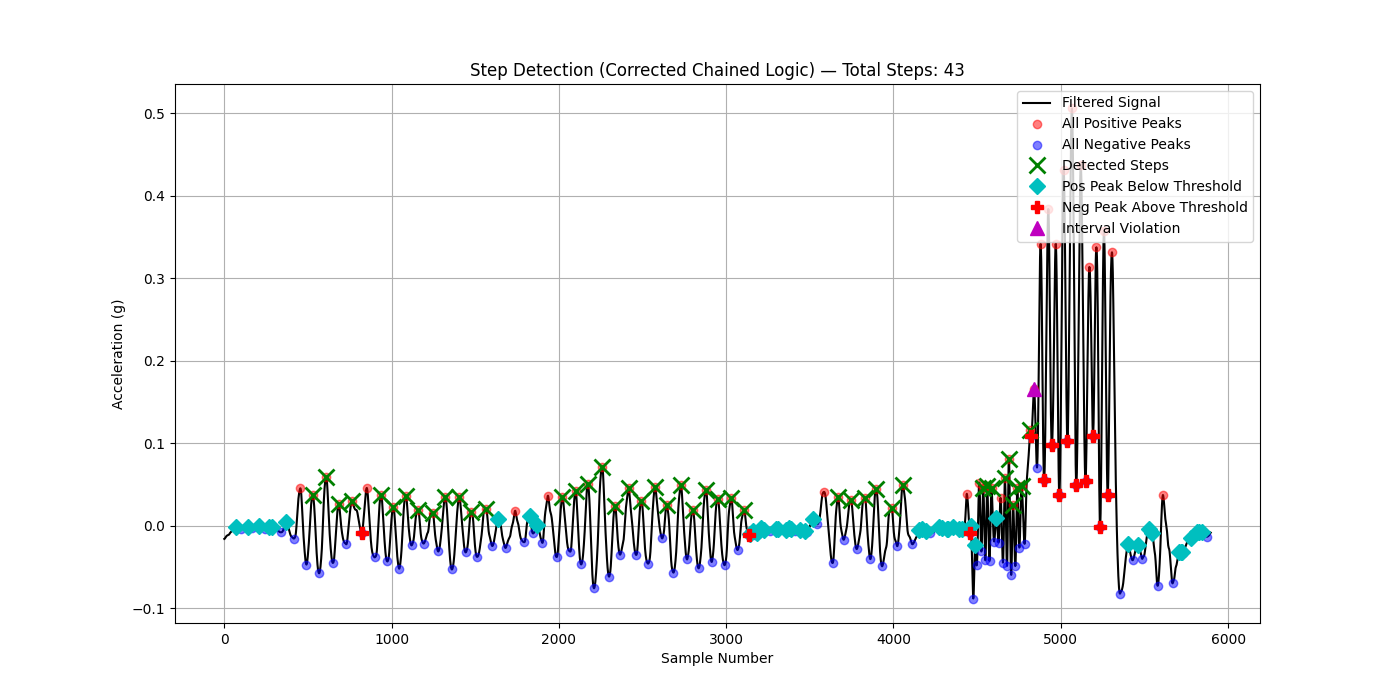

In [9]:
import numpy as np
import matplotlib.pyplot as plt


# --- Algorithm Parameters ---
pos_peak_thresh = 0.015
neg_peak_thresh = -0.015
min_peak_interval = 30

# --- Initialization ---
step_count = 0
steps_indices = []
state = "LOOKING_FOR_FIRST_MAX" 
last_step_completion_index = -min_peak_interval 
candidate_first_max_index = -1
all_pos_peaks = []
all_neg_peaks = []
violations = {
    "pos_peak_below_thresh": [],
    "neg_peak_above_thresh": [],
    "interval_violation": [],
}

# --- Iterative Peak Detection Loop ---
i = 1
while i < len(signal) - 1:
    # --- Check for local maximum (positive peak) ---
    if signal[i] > signal[i - 1] and signal[i] > signal[i + 1]:
        all_pos_peaks.append(i)
        
        if state == "LOOKING_FOR_FIRST_MAX":
            if signal[i] < pos_peak_thresh:
                violations["pos_peak_below_thresh"].append(i)
            elif (i - last_step_completion_index) <= min_peak_interval:
                violations["interval_violation"].append(i)
            else:
                state = "LOOKING_FOR_MIN"
                candidate_first_max_index = i

        elif state == "LOOKING_FOR_MIN":
            # Found another positive peak before a negative one.
            # Assume this new peak is a better starting point.
            if signal[i] >= pos_peak_thresh:
                 candidate_first_max_index = i
            else:
                 # This second peak was invalid, so reset.
                 state = "LOOKING_FOR_FIRST_MAX"

        elif state == "LOOKING_FOR_SECOND_MAX":
            if signal[i] >= pos_peak_thresh:
                # SUCCESS: This is the final peak completing the step.
                step_count += 1
                steps_indices.append(i)
                last_step_completion_index = i
                
                # =======================================================
                # --- THIS IS THE KEY LOGIC CHANGE ---
                # Instead of resetting, use this peak as the start of the next step.
                state = "LOOKING_FOR_MIN" 
                candidate_first_max_index = i
                # =======================================================
            else:
                violations["pos_peak_below_thresh"].append(i)
                state = "LOOKING_FOR_FIRST_MAX"

    # --- Check for local minimum (negative peak) ---
    if signal[i] < signal[i - 1] and signal[i] < signal[i + 1]:
        all_neg_peaks.append(i)

        if state == "LOOKING_FOR_MIN":
            if signal[i] <= neg_peak_thresh:
                state = "LOOKING_FOR_SECOND_MAX"
            else:
                violations["neg_peak_above_thresh"].append(i)
                state = "LOOKING_FOR_FIRST_MAX"
    
    i += 1 # Don't forget to increment the counter!

print(f"Step count: {step_count}")

# --- Plotting ---
plt.figure(figsize=(14, 7))
plt.plot(signal, label='Filtered Signal', linewidth=1.5, color='black')
plt.plot(all_pos_peaks, signal[all_pos_peaks], 'ro', markersize=6, alpha=0.5, label='All Positive Peaks')
plt.plot(all_neg_peaks, signal[all_neg_peaks], 'bo', markersize=6, alpha=0.5, label='All Negative Peaks')
plt.plot(steps_indices, signal[steps_indices], 'gx', markersize=12, mew=2, label='Detected Steps')
if violations["pos_peak_below_thresh"]:
    plt.plot(violations["pos_peak_below_thresh"], signal[violations["pos_peak_below_thresh"]], 'cD', markersize=8, label='Pos Peak Below Threshold')
if violations["neg_peak_above_thresh"]:
    plt.plot(violations["neg_peak_above_thresh"], signal[violations["neg_peak_above_thresh"]], 'rP', markersize=8, label='Neg Peak Above Threshold')
if violations["interval_violation"]:
    plt.plot(violations["interval_violation"], signal[violations["interval_violation"]], 'm^', markersize=10, label='Interval Violation')
plt.title(f'Step Detection (Corrected Chained Logic) — Total Steps: {step_count}')
plt.xlabel('Sample Number')
plt.ylabel('Acceleration (g)')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

## conclusao retirada:
esta abordagem é boa no entanto so funciona bem para andar com cadencia constante
uma cadencia alternada em vez de tresholds considerar amplitude de diferenca entre um pico positivo e outro negativo consecutivo, se diferenca for > threshold_amplitude entao step é detetado

hm maybe usar big dataset onde training set sao os dados dos picos:
 diferenca de tempo entre ambos, posicoes relativas, threshold positivo e negativo, diferenca de amplitude entre picos
 fazer bruteforce para ver qual melhor combinacao de valores aceitaveis da mais accuracy OU
 fazer neural networks ou svm idk e ver quais é que tem a melhor performance para ver que valores optar? 

arranjar metodo que permite aquisicao de dados em real time ao mesmo tempo que indicamos quando tamos a fazer um passo.

# Training Dataset

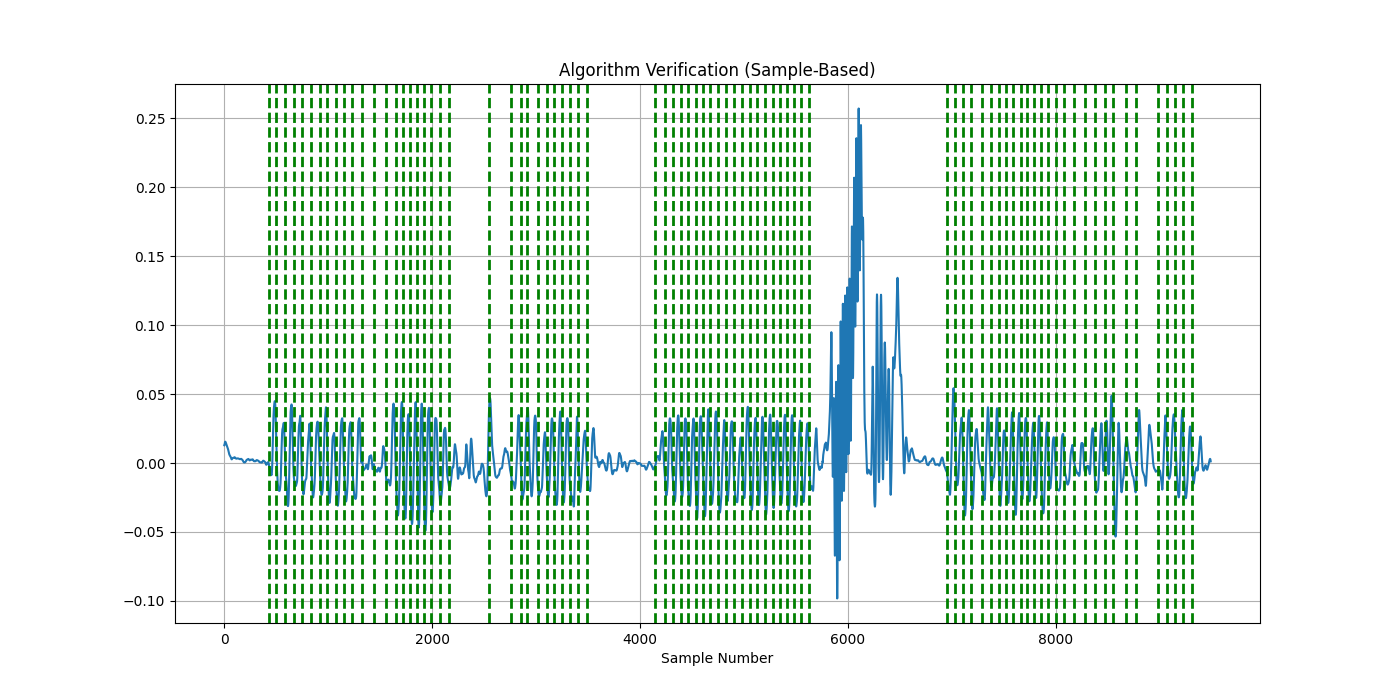

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the recorded data and your manual sample numbers
sensor_data = pd.read_csv("../data/sensor_data.csv")
manual_steps = pd.read_csv("../data/manual_step_samples.csv")

# This will give you a list of detected step *indices*, which is exactly what you need.
# For example:
# detected_step_indices = [150, 220, 285, ...] 

sensor_data['ax_lp'] = exponential_moving_average(sensor_data['ax'] , alpha=alpha)
sensor_data['ay_lp'] = exponential_moving_average(sensor_data['ay'] , alpha=alpha)
sensor_data['az_lp'] = exponential_moving_average(sensor_data['az'] , alpha=alpha)

sensor_data['accel_magnitude_lp'] = np.sqrt(sensor_data['ax_lp']**2 + sensor_data['ay_lp']**2 + sensor_data['az_lp']**2) - 1


signal = np.array(simple_moving_average(sensor_data['accel_magnitude_lp'], optimal_w))

plt.figure(figsize=(14, 7))
plt.plot(signal, label='Processed Accel Signal')

# # Plot the manual steps as vertical lines at the recorded sample numbers
for sample_num in manual_steps['sample_number']:
    plt.axvline(x=sample_num, color='g', linestyle='--', linewidth=2, label='Manual Step (Ground Truth)')


plt.title("Algorithm Verification (Sample-Based)")
plt.xlabel("Sample Number")
plt.grid(True)
plt.show()

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def find_step_intervals(signal, pos_peak_thresh, neg_peak_thresh, min_peak_interval):
    """
    Detects steps based on a Max -> Min -> Max sequence, enforcing a minimum
    width for each step.

    Args:
        signal (np.array or list): The input signal data.
        pos_peak_thresh (float): The minimum amplitude a positive peak must have.
        neg_peak_thresh (float): The maximum amplitude a negative peak must have.
        min_peak_interval (int): The minimum number of samples BETWEEN the first
                                 and second positive peaks of a single step.
    Returns:
        list: A list of detected step intervals, where each interval is a list
              in the format [sample_max_peak_1, sample_max_peak_2].
    """
    
    step_intervals = []
    state = "LOOKING_FOR_FIRST_MAX"
    candidate_first_max_index = -1

    i = 1
    while i < len(signal) - 1:
        # --- Check for local maximum (positive peak) ---
        if signal[i] > signal[i - 1] and signal[i] > signal[i + 1]:
            if state == "LOOKING_FOR_FIRST_MAX":
                # A valid positive peak can now start a sequence at any time
                if signal[i] >= pos_peak_thresh:
                    state = "LOOKING_FOR_MIN"
                    candidate_first_max_index = i
            
            elif state == "LOOKING_FOR_MIN":
                # Found another positive peak before a negative one.
                # Assume this new peak is a better starting point.
                if signal[i] >= pos_peak_thresh:
                     candidate_first_max_index = i
                else:
                     state = "LOOKING_FOR_FIRST_MAX"

            elif state == "LOOKING_FOR_SECOND_MAX":
                if signal[i] >= pos_peak_thresh:
                    # =======================================================
                    # --- THIS IS THE NEW LOGIC ---
                    # Check if the step is wide enough
                    if (i - candidate_first_max_index) >= min_peak_interval:
                        # SUCCESS: The step is valid.
                        step_intervals.append([candidate_first_max_index, i])
                        
                        # Use this peak as the start of the next step (chaining)
                        state = "LOOKING_FOR_MIN" 
                        candidate_first_max_index = i
                    else:
                        # The step was too narrow. Reset, but use the current
                        # peak as a potential start for a new step.
                        state = "LOOKING_FOR_MIN"
                        candidate_first_max_index = i
                    # =======================================================
                else:
                    # The final peak was too small, reset.
                    state = "LOOKING_FOR_FIRST_MAX"

        # --- Check for local minimum (negative peak) ---
        if signal[i] < signal[i - 1] and signal[i] < signal[i + 1]:
            if state == "LOOKING_FOR_MIN":
                if signal[i] <= neg_peak_thresh:
                    state = "LOOKING_FOR_SECOND_MAX"
                else:
                    # Negative peak was too shallow, reset.
                    state = "LOOKING_FOR_FIRST_MAX"
        
        i += 1
        
    return step_intervals


# 3. Call the function to get the step intervals
detected_intervals = find_step_intervals(
    signal=signal,
    pos_peak_thresh=0.001,
    neg_peak_thresh=-0.0005,
    min_peak_interval=50
)


Detected 68 steps.
Intervals [Max Peak 1, Max Peak 2]:


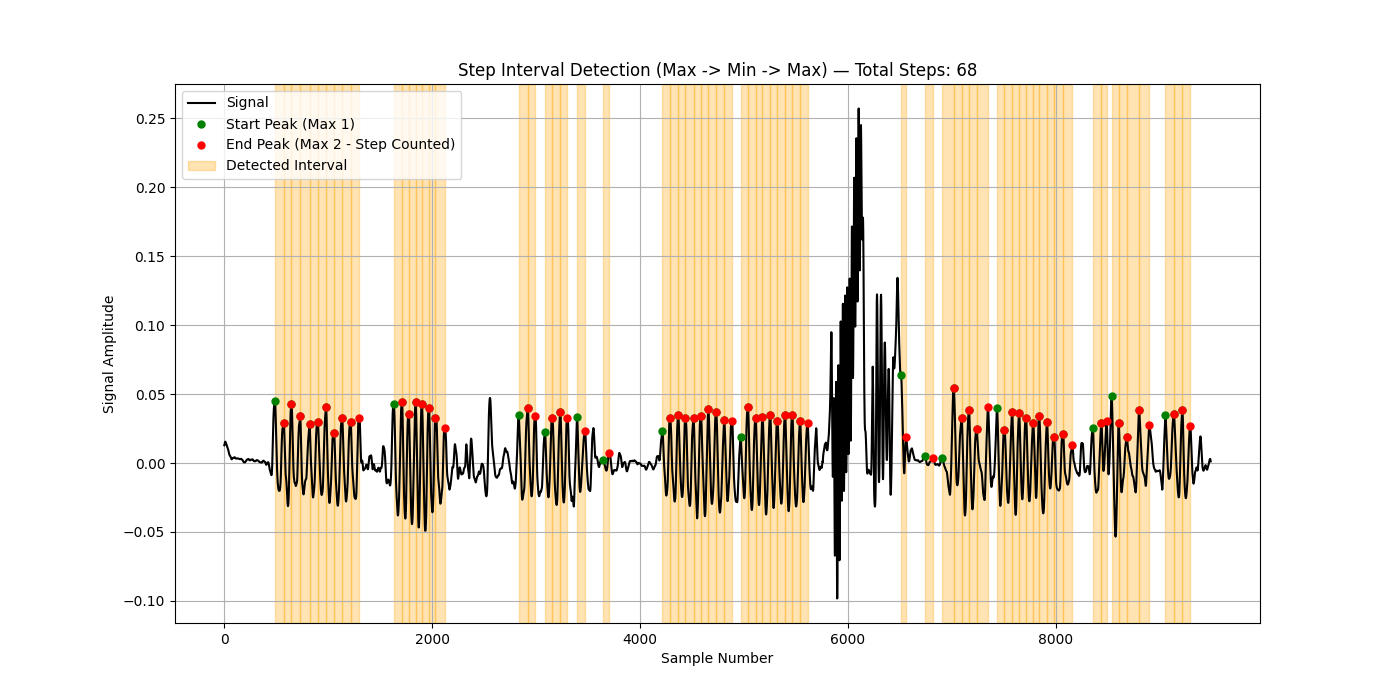

In [12]:
# 4. Print the output
print(f"Detected {len(detected_intervals)} steps.")
print("Intervals [Max Peak 1, Max Peak 2]:")

# 5. (Optional) Plot the results to verify
plt.figure(figsize=(14, 7))
plt.plot(signal, label='Signal', color='black')

# Unzip the intervals and plot the start and end peaks
if detected_intervals:
    max_peaks_1, max_peaks_2 = zip(*detected_intervals)
    plt.plot(max_peaks_1, signal[list(max_peaks_1)], 'go', markersize=5, label='Start Peak (Max 1)')
    plt.plot(max_peaks_2, signal[list(max_peaks_2)], 'ro', markersize=5, label='End Peak (Max 2 - Step Counted)')
    
    # Shade the area for each detected step interval
    for i, interval in enumerate(detected_intervals):
        label = 'Detected Interval' if i == 0 else ""
        plt.axvspan(interval[0], interval[1], color='orange', alpha=0.3, label=label)


plt.title(f'Step Interval Detection (Max -> Min -> Max) — Total Steps: {len(detected_intervals)}')
plt.xlabel('Sample Number')
plt.ylabel('Signal Amplitude')
plt.grid(True)
plt.legend()
plt.show()

## Testando accuracy

--- Algorithm Performance ---
Manual Steps Found (True Positives): 64 / 82
Manual Steps Missed (False Negatives): 18
Extra Detections (False Positives): 5


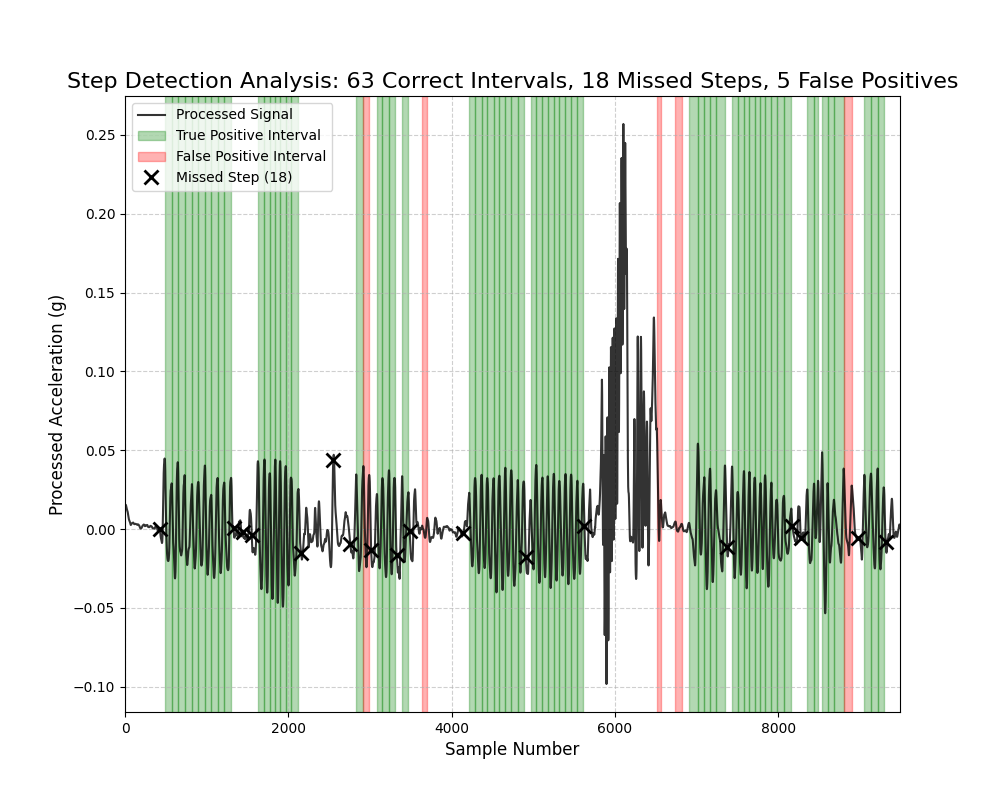

In [13]:
# =================================================================
# 3. COMPARISON LOGIC
# =================================================================
manual_steps_arr = manual_steps['sample_number'].to_numpy()
is_manual_step_detected = np.zeros(len(manual_steps_arr), dtype=bool)
is_interval_a_true_positive = np.zeros(len(detected_intervals), dtype=bool)

for i, manual_sample in enumerate(manual_steps_arr):
    for j, interval in enumerate(detected_intervals):
        start_peak_index, end_peak_index = interval
        if start_peak_index <= manual_sample <= end_peak_index:
            is_manual_step_detected[i] = True
            is_interval_a_true_positive[j] = True
            # We don't break here, allowing one interval to potentially cover two close manual steps

# Categorize everything
missed_steps = manual_steps_arr[~is_manual_step_detected]
true_positive_intervals = [interval for i, interval in enumerate(detected_intervals) if is_interval_a_true_positive[i]]
false_positive_intervals = [interval for i, interval in enumerate(detected_intervals) if not is_interval_a_true_positive[i]]

print("--- Algorithm Performance ---")
print(f"Manual Steps Found (True Positives): {np.sum(is_manual_step_detected)} / {len(manual_steps_arr)}")
print(f"Manual Steps Missed (False Negatives): {len(missed_steps)}")
print(f"Extra Detections (False Positives): {len(false_positive_intervals)}")

# =================================================================
# 4. PLOTTING
# =================================================================
plt.figure(figsize=(10, 8))

# --- Plot the main signal ---
plt.plot(signal, color='black', label='Processed Signal', zorder=2, alpha=0.8)

# --- Plot the results using shaded areas ---
# True Positives (Green shaded areas)
for i, interval in enumerate(true_positive_intervals):
    label = 'True Positive Interval' if i == 0 else ""
    plt.axvspan(interval[0], interval[1], color='green', alpha=0.3, label=label, zorder=1)

# False Positives (Red shaded areas)
for i, interval in enumerate(false_positive_intervals):
    label = 'False Positive Interval' if i == 0 else ""
    plt.axvspan(interval[0], interval[1], color='red', alpha=0.3, label=label, zorder=1)

# Missed Steps (Black 'X' markers)
if len(missed_steps) > 0:
    plt.plot(missed_steps, signal[missed_steps], 'kx', markersize=10, mew=2, label=f'Missed Step ({len(missed_steps)})', zorder=5)

# --- Final Touches ---
title = f"Step Detection Analysis: {len(true_positive_intervals)} Correct Intervals, {len(missed_steps)} Missed Steps, {len(false_positive_intervals)} False Positives"
plt.title(title, fontsize=16)
plt.xlabel("Sample Number", fontsize=12)
plt.ylabel("Processed Acceleration (g)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(0, len(sensor_data))
plt.show()

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def test_accuracy(signal, detected_intervals, manual_steps_df):
    """
    Calculates and visualizes the performance of a step detection algorithm.

    This function compares the intervals found by an algorithm against a list of
    manually-recorded "ground truth" steps. It calculates performance metrics
    (Precision, Recall, F1-Score) and generates a plot that clearly distinguishes
    between true positives, false positives, and false negatives.

    Args:
        signal (np.array or list): The processed signal that was analyzed.
        detected_intervals (list): The list of [start, end] intervals returned
                                   by the step detection algorithm.
        manual_steps_df (pd.DataFrame): A DataFrame loaded from your CSV,
                                        containing a 'sample_number' column.
    
    Returns:
        dict: A dictionary containing the calculated performance metrics.
    """
    
    # =================================================================
    # 1. COMPARISON LOGIC
    # =================================================================
    manual_steps_arr = manual_steps_df['sample_number'].to_numpy()
    
    # Boolean flags to track matches
    is_manual_step_detected = np.zeros(len(manual_steps_arr), dtype=bool)
    is_interval_a_true_positive = np.zeros(len(detected_intervals), dtype=bool)

    # Iterate through each manual step to see if it was found
    for i, manual_sample in enumerate(manual_steps_arr):
        for j, interval in enumerate(detected_intervals):
            start_peak_index, end_peak_index = interval
            # Check if the manual step falls within the detected interval
            if start_peak_index <= manual_sample <= end_peak_index:
                is_manual_step_detected[i] = True
                is_interval_a_true_positive[j] = True
                break # A manual step can only be found once

    # --- Calculate performance metrics ---
    true_positives = np.sum(is_manual_step_detected)
    false_negatives = len(manual_steps_arr) - true_positives
    false_positives = len(detected_intervals) - np.sum(is_interval_a_true_positive)
    
    # Precision: Of all the steps we detected, how many were real?
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    # Recall: Of all the real steps that exist, how many did we find?
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    # F1-Score: The harmonic mean of Precision and Recall. A single great score.
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # --- Print the performance report ---
    print("--- Algorithm Performance Report ---")
    print(f"Manual Steps Found (True Positives):   {true_positives} / {len(manual_steps_arr)}")
    print(f"Manual Steps Missed (False Negatives): {false_negatives}")
    print(f"Extra Detections (False Positives):    {false_positives}")
    print("-" * 36)
    print(f"Precision: {precision:.2%}")
    print(f"Recall:    {recall:.2%}")
    print(f"F1-Score:  {f1_score:.4f}")
    print("-" * 36)
    
    return {
        'true_positives': true_positives,
        'false_negatives': false_negatives,
        'false_positives': false_positives,
        'precision': precision,
        'recall': recall,
        'f1_score': f1_score
    }



# 3. Run your algorithm to get the detected intervals
# These parameters will intentionally create a miss and a false positive
detected_intervals = find_step_intervals(
    signal=signal,
    pos_peak_thresh=0.005,
    neg_peak_thresh=-0.005,
    min_peak_interval=40
)
# Manually add a false positive for demonstration
# detected_intervals.append([1800, 1850])

print("\nAlgorithm detected the following intervals:")
print(detected_intervals)

# 4. Call the new function to get the full performance analysis
performance_metrics = test_accuracy(signal, detected_intervals, manual_steps)



Algorithm detected the following intervals:
[[486, 571], [571, 646], [646, 730], [730, 820], [820, 897], [897, 978], [978, 1056], [1056, 1134], [1134, 1215], [1215, 1299], [1628, 1708], [1708, 1773], [1773, 1841], [1841, 1899], [1899, 1969], [1969, 2032], [2032, 2124], [2328, 2375], [2832, 2919], [2919, 2991], [3086, 3153], [3153, 3233], [3233, 3301], [3394, 3471], [4216, 4288], [4288, 4368], [4368, 4437], [4437, 4515], [4515, 4585], [4585, 4658], [4658, 4730], [4730, 4811], [4811, 4883], [4968, 5037], [5037, 5112], [5112, 5178], [5178, 5252], [5252, 5319], [5319, 5395], [5395, 5464], [5464, 5541], [5541, 5612], [6239, 6280], [6393, 6438], [6511, 6561], [7017, 7095], [7095, 7165], [7165, 7238], [7238, 7348], [7435, 7504], [7504, 7581], [7581, 7648], [7648, 7713], [7713, 7783], [7783, 7840], [7840, 7917], [7917, 7981], [7981, 8070], [8070, 8160], [8356, 8439], [8439, 8489], [8489, 8538], [8538, 8605], [8605, 8682], [8682, 8802], [8802, 8901], [9056, 9136], [9136, 9218], [9218, 9293]]
-

## Otimizar parametros para melhor f1-score

In [15]:
import pandas as pd
import numpy as np
import itertools
import time

# =================================================================
# 2. NEW: Lean Performance Calculation Function (No Plotting)
# =================================================================
def calculate_metrics(detected_intervals, manual_steps_arr):
    """Compares results to ground truth and returns performance metrics."""
    is_manual_step_detected = np.zeros(len(manual_steps_arr), dtype=bool)
    is_interval_a_true_positive = np.zeros(len(detected_intervals), dtype=bool)

    for i, manual_sample in enumerate(manual_steps_arr):
        for j, interval in enumerate(detected_intervals):
            if interval[0] <= manual_sample <= interval[1]:
                is_manual_step_detected[i] = True
                is_interval_a_true_positive[j] = True
                break
    
    true_positives = np.sum(is_manual_step_detected)
    false_negatives = len(manual_steps_arr) - true_positives
    false_positives = len(detected_intervals) - np.sum(is_interval_a_true_positive)
    
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return {'TP': true_positives, 'FN': false_negatives, 'FP': false_positives, 'f1_score': f1_score}

def brute_force_optimize(signal, manual_steps_df, pos_thresholds, neg_thresholds, min_intervals):
    """
    Tests all combinations of parameters and returns the top 5 best performers.
    """
    manual_steps_arr = manual_steps_df['sample_number'].to_numpy()
    
    # Create a list of all parameter combinations to test
    param_grid = list(itertools.product(pos_thresholds, neg_thresholds, min_intervals))
    
    print(f"Starting brute-force optimization...")
    print(f"Total combinations to test: {len(param_grid)}\n")
    
    all_results = []
    start_time = time.time()

    # --- Main Loop ---
    for i, params in enumerate(param_grid):
        pos_thresh, neg_thresh, min_interval = params
        
        # 1. Run the core algorithm with the current set of parameters
        detected_intervals = find_step_intervals(signal, pos_thresh, neg_thresh, min_interval)
        
        # 2. Calculate the performance metrics for this run
        metrics = calculate_metrics(detected_intervals, manual_steps_arr)
        
        # 3. Store the results
        all_results.append({
            'params': {'pos_thresh': pos_thresh, 'neg_thresh': neg_thresh, 'min_interval': min_interval},
            'metrics': metrics
        })
        
        # Progress update to the console
        if (i + 1) % int(len(param_grid)/10) == 0:
            print(f"  ... processed {i + 1}/{len(param_grid)} combinations")

    end_time = time.time()
    print(f"\nOptimization complete in {end_time - start_time:.2f} seconds.")
    
    # --- Sort the results by F1-Score in descending order ---
    sorted_results = sorted(all_results, key=lambda x: x['metrics']['f1_score'], reverse=True)
    
    # Return the top 20
    return sorted_results

In [16]:
# 2. --- DEFINE THE PARAMETER SEARCH SPACE ---
# Provide the lists of values you want to test for each parameter.
# Be careful: the total combinations can grow very quickly!
pos_thresholds_to_test = np.linspace(0.001, 0.001, 1)
neg_thresholds_to_test = np.linspace(-0.02, -0.0001, 1)
min_intervals_to_test = np.linspace(40, 60, 50)

# 3. Run the optimization function
top_results = brute_force_optimize(
    signal=signal,
    manual_steps_df=manual_steps,
    pos_thresholds=pos_thresholds_to_test,
    neg_thresholds=neg_thresholds_to_test,
    min_intervals=min_intervals_to_test
)

Starting brute-force optimization...
Total combinations to test: 50

  ... processed 5/50 combinations
  ... processed 10/50 combinations
  ... processed 15/50 combinations
  ... processed 20/50 combinations
  ... processed 25/50 combinations
  ... processed 30/50 combinations
  ... processed 35/50 combinations
  ... processed 40/50 combinations
  ... processed 45/50 combinations
  ... processed 50/50 combinations

Optimization complete in 0.36 seconds.


In [17]:
top_n = 100
# 4. Print the final report of the top 5 performers
print("\n" + "="*50)
print("           TOP {top_n} BEST PARAMETER SETS")
print("="*50)
for i, result in enumerate(top_results[0:top_n]):
    params = result['params']
    metrics = result['metrics']
    print(f"\n--- Rank #{i+1} ---")
    print(f"F1-Score: {metrics['f1_score']:.6f}")
    print(f"  - Parameters: pos_thresh={params['pos_thresh']:.6f}, neg_thresh={params['neg_thresh']:.6f}, min_interval={params['min_interval']}")
    print(f"  - Performance: {metrics['TP']} Correct, {metrics['FN']} Missed, {metrics['FP']} False Positives")


           TOP {top_n} BEST PARAMETER SETS

--- Rank #1 ---
F1-Score: 0.814286
  - Parameters: pos_thresh=0.001000, neg_thresh=-0.020000, min_interval=45.30612244897959
  - Performance: 57 Correct, 25 Missed, 1 False Positives

--- Rank #2 ---
F1-Score: 0.814286
  - Parameters: pos_thresh=0.001000, neg_thresh=-0.020000, min_interval=45.714285714285715
  - Performance: 57 Correct, 25 Missed, 1 False Positives

--- Rank #3 ---
F1-Score: 0.814286
  - Parameters: pos_thresh=0.001000, neg_thresh=-0.020000, min_interval=46.12244897959184
  - Performance: 57 Correct, 25 Missed, 1 False Positives

--- Rank #4 ---
F1-Score: 0.814286
  - Parameters: pos_thresh=0.001000, neg_thresh=-0.020000, min_interval=46.53061224489796
  - Performance: 57 Correct, 25 Missed, 1 False Positives

--- Rank #5 ---
F1-Score: 0.814286
  - Parameters: pos_thresh=0.001000, neg_thresh=-0.020000, min_interval=46.93877551020408
  - Performance: 57 Correct, 25 Missed, 1 False Positives

--- Rank #6 ---
F1-Score: 0.814286

# Implementar PARAMETRO QUE DETETA AS ALTURAS RELATIVAS ENTRE PICOS AO INVES DE TRESHOLDS PARECE MELHOR OPCCAO